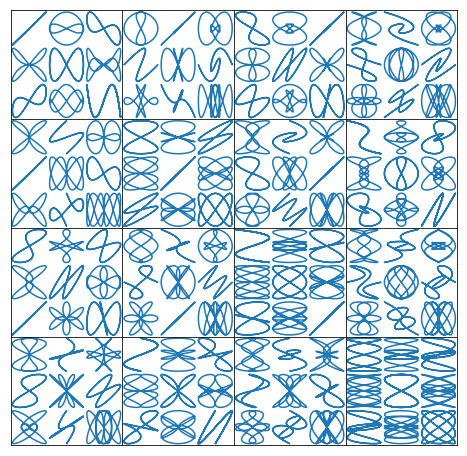

In [2]:
# %load demo_gridspec06.py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

try:
    from itertools import product
except ImportError:
    # product is new in v 2.6
    def product(*args, **kwds):
        pools = map(tuple, args) * kwds.get('repeat', 1)
        result = [[]]
        for pool in pools:
            result = [x+[y] for x in result for y in pool]
        for prod in result:
            yield tuple(prod)


def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

fig = plt.figure(figsize=(8, 8))

# gridspec inside gridspec
outer_grid = gridspec.GridSpec(4, 4, wspace=0.0, hspace=0.0)

for i in range(16):
    inner_grid = gridspec.GridSpecFromSubplotSpec(3, 3,
            subplot_spec=outer_grid[i], wspace=0.0, hspace=0.0)
    a, b = int(i/4)+1,i%4+1
    for j, (c, d) in enumerate(product(range(1, 4), repeat=2)):
        ax = plt.Subplot(fig, inner_grid[j])
        ax.plot(*squiggle_xy(a, b, c, d))
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

all_axes = fig.get_axes()

#show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
    if ax.is_first_row():
        ax.spines['top'].set_visible(True)
    if ax.is_last_row():
        ax.spines['bottom'].set_visible(True)
    if ax.is_first_col():
        ax.spines['left'].set_visible(True)
    if ax.is_last_col():
        ax.spines['right'].set_visible(True)

plt.show()

